<a href="https://colab.research.google.com/github/MINIVO2/Neural_Network_classification_with_Tensorflow/blob/main/03_Introduction_to_CNN_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to convolutional Neural Network and computer vision with tensorflow

##Get the data

https://www.kaggle.com/datasets/dansbecker/food-101

but we are using from ZTM course git hub

https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#!wget get the above file and download in GC

#unzip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-08-18 14:14:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.207, 108.177.11.207, 142.251.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   305MB/s    in 0.3s    

2024-08-18 14:14:18 (305 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



##Inspect the data(become one with it)

In [ ]:
!ls pizza_steak/

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} dictionaris and {len(filenames)} images in {dirpath} ")

There are 2 dictionaris and 0 images in pizza_steak 
There are 2 dictionaris and 0 images in pizza_steak/train 
There are 0 dictionaris and 750 images in pizza_steak/train/pizza 
There are 0 dictionaris and 750 images in pizza_steak/train/steak 
There are 2 dictionaris and 0 images in pizza_steak/test 
There are 0 dictionaris and 250 images in pizza_steak/test/pizza 
There are 0 dictionaris and 250 images in pizza_steak/test/steak 


In [ ]:
num_steak_images_train = len(os.listdir("/content/pizza_steak/train/steak"))
num_steak_images_train

750

##to visualize our images , first lets get the class names programatically (class names)

In [ ]:
#get the class names programatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train") #data_dir is set to the path pizza_steak/train, using pathlib.Path to handle the path.

class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #create a list of class names for subdirectory

class_names

array(['pizza', 'steak'], dtype='<U5')

###view_random_image()

In [ ]:
#lets visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mping
import os
import random

def view_random_image(target_dir, target_class):
  #setup the target directory
  target_folder = target_dir + "/"+ target_class

  #get a random image path

  random_image = random.choice(os.listdir(target_folder))

  #read in the image and plot it using matplotlib
  img = mping.imread(target_folder + "/" + random_image)



  plt.title(target_class)
  plt.axis(False)
  plt.imshow(img)

  print(f"The shape of the image is : {img.shape}") #show shape of the image

  return img

The shape of the image is : (384, 512, 3)


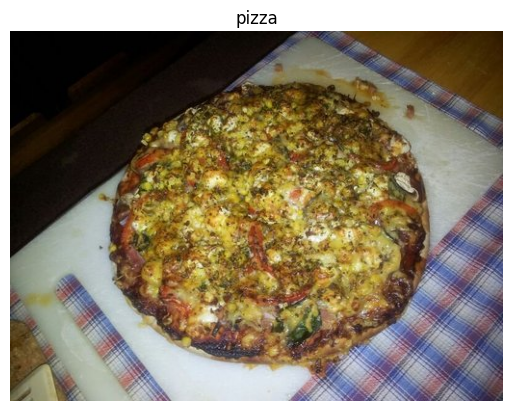

In [ ]:
img = view_random_image(target_dir = "/content/pizza_steak/train/", target_class = "pizza")

In [ ]:
import tensorflow as tf
img_tensor = tf.constant(img)
img_tensor

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [ 45,  25,   0],
        [ 44,  24,   0],
        [ 43,  23,   0]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [ 46,  26,   1],
        [ 44,  24,   0],
        [ 43,  23,   0]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [ 46,  26,   0],
        [ 45,  25,   0],
        [ 44,  24,   0]],

       ...,

       [[101,  95,  61],
        [107, 103,  68],
        [113, 109,  74],
        ...,
        [ 56,  56,  66],
        [ 40,  43,  52],
        [ 37,  40,  49]],

       [[106,  98,  62],
        [112, 106,  70],
        [118, 112,  76],
        ...,
        [ 69,  69,  81],
        [ 55,  57,  69],
        [ 52,  56,  67]],

       [[106,  98,  61],
        [113, 105,  68],
        [113, 107,  71],
        ...,
        [ 50,  52,  6

##normalization

In [ ]:
np.max(img_tensor), np.min(img_tensor)

(255, 0)

In [ ]:


#so we devide by the max value to normalize the data
img/255.

array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.17647059, 0.09803922, 0.        ],
        [0.17254902, 0.09411765, 0.        ],
        [0.16862745, 0.09019608, 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.18039216, 0.10196078, 0.00392157],
        [0.17254902, 0.09411765, 0.        ],
        [0.16862745, 0.09019608, 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.18039216, 0.10196078, 0.        ],
        [0.17647059, 0.09803922, 0.        ],
        [0.17254902, 0.09411765, 0.        ]],

       ...,

       [[0.39607843, 0.37254902, 0.23921569],
        [0.41960784, 0.40392157, 0.26666667],
        [0.44313725, 0

##Build CNN (end to end example)

https://poloclub.github.io/cnn-explainer/

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#preprocessing data(getting all the data between 0s and 1s)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#import the directories of test and training sets

train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

#import data from the directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                              batch_size = 32,
                                              target_size= (224,224),
                                              class_mode = "binary",
                                              seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size= 32,
                                               target_size= (224,224),
                                               class_mode = "binary",
                                               seed = 42)


#Build a CNN model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                            padding = "valid"),
    tf.keras.layers.Conv2D(10,3,activation ="relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#compile the model

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Calculate steps_per_epoch and validation_steps
steps_per_epoch = len(train_data)
validation_steps = len(valid_data)

#fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps= len(valid_data))

#change the runtime GPU

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


if the above code is taking much time then change the runtime to GPU

In [ ]:
# len(train_data) #its 47 cause in total there are 1500 images in training data and 1500/ 32 which is batch size is 46.874 ~ 47 bathes

#to beat 47/47 [==============================] - 98s 2s/step - loss: 0.5856 - accuracy: 0.6860 - val_loss: 0.4293 - val_accuracy: 0.8140

In [ ]:
model_1.summary()

##use the same model as before (tensoflow playground)

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (224,224,3)),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid"),
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

hgistory_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps= len(valid_data))


In [ ]:
model_2.summary()

Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly

deep learning model

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, activation= "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation= "relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid")
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps= len(valid_data))



In [ ]:
model_3.summary( )

##Binary classification: lets break it down



###1. Become one with the data

In [ ]:
import matplotlib.pyplot as plt
#plt.figure()
plt.subplot(1,2,1)
steak_image = view_random_image("/content/pizza_steak/train/", "steak" )
plt.subplot(1,2,2)
pizza_image = view_random_image("/content/pizza_steak/train/", "pizza")

###preprocess the data (prepare a model)

In [ ]:
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

turn data into batches(small subsets of data) defalut value 32 batch size

In [ ]:
#create train and test data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size=(224,224),#hieght and width
                                               class_mode = "binary",
                                               batch_size = 32,
                                               seed = 42)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "binary",
                                             seed = 42)

###images,labels

In [ ]:
#get a sample of train data batch
images, labels = train_data.next()# get the next batch of images/ labels in training data
len(images), len(labels)

In [ ]:
#how many batches are there in total
len(train_data)

In [ ]:
1500/32

In [ ]:
images[:2], images[0].shape

In [ ]:
labels

### 3. Create a CNN model(start with a base line)

A baseline is a simple model

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential


In [ ]:
model_4 = Sequential([
    Conv2D(filters = 10, #filters is a number of sliding windows going across an input(higher = more complex model)
           kernel_size = 3, #the size of the slkiding window going across an input
           strides = 1,#the size of the step the sliding window takes across an image
           padding = "valid", #if "same", output shape is same as input shape , but if its "valid" output_sahpe gets compressed
           activation = "relu",
           input_shape=(224, 224, 3)),#input layer shape
    Conv2D(10,3,activation = "relu"),
    Conv2D(10, 3 , activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid")
])


In [ ]:
#compile the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ["accuracy"])

#fit the model
history_4 = model_4.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps= len(test_data))

In [ ]:
model_4.summary()

In [ ]:
218*218*10

In [ ]:
model_1.evaluate(test_data)

###5. Evaluate our model

In [ ]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10,7))

###plot_loss_and_accuracy_curve():

In [ ]:
def plot_loss_and_accuracy_curve(history):
  '''
  Returns loss and accuracy curves with respect to epochs
  '''

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) #can take anything to count the epochs

  #plot the loss and val_loss
  plt.figure()
  plt.plot(epochs, loss, label= "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.legend()

  #plot the accuracy and val_accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label= "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("Accuracy")
  plt.legend()



In [ ]:
plot_loss_and_accuracy_curve(history_4)

**Note :** When a models validation loss starts to increase, its likely that the model is **overfitting** the training data set, means its just learning the traininng the training data set and not the patterns and algorithms which decreases the models ability to recognize the unseen data as its **diminished**.


When there are large descrpencencies betwee validation loss and training loss then it can be overfittting and under fitting

###6. Adjust the model parameters


0. Create a baseline
1. Beat the baseline by overfitting a large model
2. reduce the overfitting
  

In [ ]:
#create the model

model_5 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding= "valid",
           activation = "relu",
           input_shape= (224,224,3)),
    MaxPool2D(pool_size= 2 ),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = "sigmoid")
])



In [ ]:
#compile and fit the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ["accuracy"])

#fit the model
history_5 = model_5.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps= len(test_data))

In [ ]:
model_4.summary()

In [ ]:
model_5.summary()

In [ ]:
plot_loss_and_accuracy_curve(history_5)

###Data Augmentation

In [ ]:
#global variable of target_size
IMG_SIZE = (224,224)

In [ ]:
#create ImageDataGenerator training instance with data augmentation

train_datagen_augmentation = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2, #how much u want to rotate
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2, #move image along x-axis
                                             height_shift_range = 0.2,#move image along y -axis
                                             horizontal_flip = True) #as the shape

#create ImageDataGenerator without data augmentation

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen= ImageDataGenerator(rescale = 1/255.)    #NOTEBOOK

In [ ]:
#import data and augment it from training data

print("Augmented Training Data")
train_data_augmented = train_datagen_augmentation.flow_from_directory(directory = train_dir,
                                                                      target_size = IMG_SIZE,
                                                                      batch_size = 32,
                                                                      class_mode = "binary",
                                                                      shuffle = False,
                                                                      seed = 42)
#create non_augmented test and training data batches
print("NON-Augmented data")
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                                  target_size = IMG_SIZE,
                                                  #default batch_size is 32
                                                  class_mode = "binary",
                                                  shuffle = False,
                                                  seed = 42)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = IMG_SIZE,
                                             class_mode = "binary",
                                             shuffle= False,
                                             seed = 42)

In [ ]:
#getting the batch size
len(train_data)

In [ ]:
#get the sample data batches
images, labels = train_data.next()
augmented_image, augmented_labels = train_data_augmented.next()

In [ ]:
import random

random_num= random.randint(0,31)
print(f"The random number is: {random_num}")
plt.imshow(images[random_num])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_image[random_num])
plt.title(f"Augmented image")
plt.axis(False)



###Build the model (Augnmented data)

In [ ]:
model_6 = Sequential([
    Conv2D(10,3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])


model_6.compile(loss = tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer = Adam(),
                metrics = ["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch= len(train_data_augmented),
                        validation_data= test_data,
                        validation_steps = len(test_data))

In [ ]:
plot_loss_and_accuracy_curve(history_6)

###Shuffled data Augmented

In [ ]:
train_data_augmented_shuffled = train_datagen_augmentation.flow_from_directory(directory = train_dir,
                                                                               target_size = IMG_SIZE,
                                                                               class_mode= "binary",
                                                                               batch_size = 32,
                                                                               shuffle = True,
                                                                               seed = 42)
train_data_shuffled = train_datagen.flow_from_directory(directory = train_dir,
                                                        target_size = IMG_SIZE,
                                                        class_mode= "binary",
                                                        batch_size = 32,
                                                        shuffle = True,
                                                        seed = 42)
test_data_shuffled = test_datagen.flow_from_directory(directory = test_dir,
                                                      target_size = IMG_SIZE,
                                                      class_mode= "binary",
                                                      batch_size = 32,
                                                      shuffle = True,
                                                      seed = 42)

In [ ]:
images_augmented, labels_augmented = train_data_augmented_shuffled.next()
images , labels = train_data_shuffled.next()

In [ ]:
model_7 = Sequential([
    Conv2D(10,3, activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])


model_7.compile(loss = tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer = Adam(),
                metrics = ["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch= len(train_data_augmented_shuffled),
                        validation_data= test_data,
                        validation_steps = len(test_data))

In [ ]:
plot_loss_and_accuracy_curve(history_7)

##Practice (Binary classification)

In [ ]:
model_8 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                            padding = "valid"),
    tf.keras.layers.Conv2D(10,3,activation ="relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#compile the model

model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])



#fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data = valid_data,
                        validation_steps= len(valid_data))


In [ ]:
plot_loss_and_accuracy_curve(history_8)

#Making a prediction with our trained model on our own custom data

In [ ]:
print(class_names)

In [ ]:
#!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/bd065b806249f7b1155e5b1fabd130c5cfc9d184/images/03-steak.jpeg

In [ ]:
import matplotlib.image as mping
import matplotlib.pyplot as plt
steak_image = mping.imread("/03-steak.jpeg")
plt.imshow(steak_image)
plt.axis(False)

In [ ]:
steak_image.shape

In [ ]:
# prediction = model_2.predict(tf.expand_dims(ice_pre, axis=0))
# rounded_prediction = tf.round(prediction).numpy()  # Convert to NumPy array
# pred_ice_index = int(np.argmax(rounded_prediction))  # Get the index of the max value
# pred_ice = class_names[pred_ice_index]  # Use the index to get the class name
# pred_ice


your suppose to preprocces your custom data

## function to load images for your custom data and resize it def load_and_prep_image(filename, img_shape= 224 ):

In [ ]:
def prediction(filename, model, classnames = class_names):
  '''
  imports an image located at filrname, makes a prediction with the model and
  plots the image with the predicted class
  '''
  #preprocess the image
  img = preprocess_image(filename)

  #make prediction using the model
  pred = model.predict(tf.expand_dims(img, axis = 0))

  pred_round = tf.round(pred).numpy()
  pred_index = int(np.argmax(pred_round))

  #index on the particular class name
  pred_class = classnames[pred_index]

  #visualize the image
  plt.imshow(img)
  print(f"Prediction : {pred_class}")

  plt.axis(False)

In [ ]:
steak= preprocess_image("/content/03-steak.jpeg")
steak

# steak_image = mping.imread("/content/03-steak.jpeg")
# plt.imshow(steak_image)
# plt.axis(False)

In [ ]:
model_8.predict(tf.expand_dims(steak, axis = 0)) #transpose expects a vector of size 3. But input(1) is a vector of size 4


#so use expand_dims

##last step is to visualize the image with function : def prediction(filename, model, classnames = class_names)(binary):

In [ ]:
class_names

pred_steak = class_names[int(tf.round(model_8.predict(tf.expand_dims(steak,axis = 0))))]
pred_steak #class name is correct

In [ ]:
def prediction(filename, model, classnames = class_names):
  '''
  imports an image located at filrname, makes a prediction with the model and
  plots the image with the predicted class
  '''
  #preprocess the image
  img = preprocess_image(filename)

  #make prediction using the model
  pred = model.predict(tf.expand_dims(img, axis = 0))

  #index on the particular class name
  pred_class = classnames[int(tf.round(pred))]

  #visualize the image
  plt.imshow(img)
  print(f"Prediction : {pred_class}")

  plt.axis(False)

In [ ]:
prediction("/03-steak.jpeg", model_8)

In [ ]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/bd065b806249f7b1155e5b1fabd130c5cfc9d184/images/03-pizza-dad.jpeg

#Multi-class Image Classification

## 1. import and become one with data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zipref_1 = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zipref_1.extractall()
zipref_1.close()


In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("/content/10_food_classes_all_data"):
  print(f"There are {len(dirnames)} dictionaris and {len(filenames)} images in {dirpath} ")



In [ ]:
#setup train and test directories
train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

In [ ]:
#lets get the classnames
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

In [ ]:
#visualize

import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))


In [ ]:
random.choice(class_names)

## 2.Preprocess the data

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = 'categorical',
                                               batch_size = 32
                                               )

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                               class_mode = 'categorical',
                                               batch_size = 32)

##3. create a model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Flatten, Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
model_1_m = Sequential([
    Conv2D(filters = 10, kernel_size = 3, input_shape=(224,224,3)),
    Activation(activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3, activation = 'relu'),

    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax') #since there are 10 classes in both test and train (10 output neurons)

])

model_1_m.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=Adam(),
    metrics=["accuracy"]
)


history_1_m= model_1_m.fit(train_data,
              epochs = 5,
              steps_per_epoch= len(train_data),
              validation_data = test_data, #int(o.25 * test_data)
              validation_steps = len(test_data))

## 3. Evaluate the model

In [ ]:
model_1_m.evaluate(test_data)

In [ ]:
import pandas as pd

pd.DataFrame(history_1_m.history).plot(figsize = (10,7))

In [ ]:
import matplotlib.pyplot as plt
plot_loss_and_accuracy_curve(history_1_m)


It seems our model is overfitting , it means itr is getting great reults on training data and cannot evalutae or generalise on the unseen data and perform badly on test data set

##4. Adjust the model hyperparameters(to beat the baseline/ reduce overfitting)

get more data

simplify the model

use data Augmentation

use transfer learning

###remove 2 convutional layers


In [ ]:
model_2_m = Sequential([
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

model_2_m.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy']

)

history_2_m = model_2_m.fit(train_data,
              epochs = 5,
              steps_per_epoch = len(train_data),
              validation_data = test_data,
              validation_steps = len(test_data))

In [ ]:
model_1_m.summary()

In [ ]:
model_2_m.summary()

In [ ]:
plot_loss_and_accuracy_curve(history_2_m)

###Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             shear_range = 0.2,
                                             horizontal_flip= True
                                             )

test_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             shear_range = 0.2,
                                             horizontal_flip= True)

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   shuffle = True)

test_data_augmented = test_datagen_augmented.flow_from_directory(directory = test_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   shuffle = True)




### clone model

In [ ]:
model_3_m = tf.keras.models.clone_model(model_1_m) #it just gets the architecture
model_3_m.compile(
    loss = "categorical_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

history_3_m = model_3_m.fit(train_data_augmented,
                            epochs = 5,
                            steps_per_epoch = len(train_data_augmented),
                            validation_data = test_data,
                            validation_steps= len(test_data))

In [ ]:
model_1_m.evaluate(test_data)

In [ ]:
model_3_m.evaluate(test_data)

In [ ]:
plot_loss_and_accuracy_curve(history_3_m)

after this the loss curves are much close so if we train for longer it will be much closer

##Repeat Until Satisfied

#Make predictions on our Custom Data

In [ ]:
import matplotlib.image as mping
import matplotlib.pyplot as plt

pizza_img = mping.imread("/content/03-pizza-dad.jpeg")
plt.imshow(pizza_img)
plt.axis(False)


##make a prediction using model_3_m

###prediction_multiclass(filename, model, classnames = class_names)(Multi-class):

In [ ]:
#reconfigure prediction function for multiclass

def prediction_multiclass(filename, model, classnames = class_names):
  '''
  imports an image located at filrname, makes a prediction with the model and
  plots the image with the predicted class
  '''
  #preprocess the image
  img = preprocess_image(filename)

  #make prediction using the model
  pred = model.predict(tf.expand_dims(img, axis = 0))

  #*******************
  #Add in for multiclass and pred class

  if len(pred[0]) > 1: #as softmax gives 10 output and sigmoid gives only one this change is needed
    pred_class= class_names[tf.argmax(pred[0])]
  else:
    #index on the particular class name
    pred_class = class_names[int(tf.round(pred[0]))]

  #*****************

  #visualize the image
  plt.imshow(img)
  print(f"Prediction : {pred_class}")

  plt.axis(False)

In [ ]:
prediction_multiclass("/content/03-pizza-dad.jpeg", model_3_m, classnames=class_names)

#Saving and Loading Our model

In [ ]:
model_3_m.save("Save_trained_multiclass_model")

In [ ]:
#load in trained model and evaluate
loaded_model_3 = tf.keras.models.load_model("Save_trained_multiclass_model")
loaded_model_3.evaluate(test_data)

In [ ]:
model_3_m.evaluate(test_data)